In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
data = pd.read_csv("/content/Ecommerce Customers.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [43]:
data.describe()
#

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


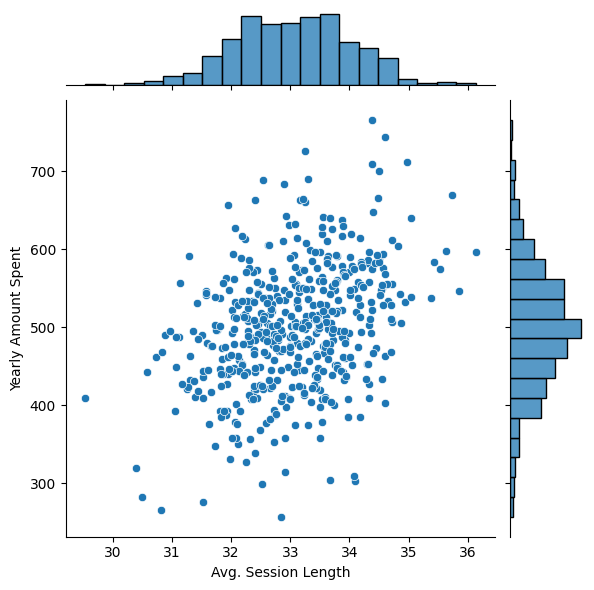

In [44]:
sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent',data=data)

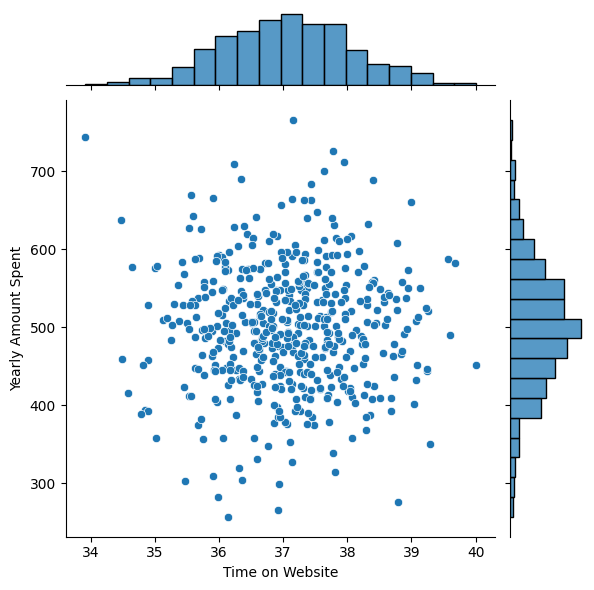

In [61]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data)
#

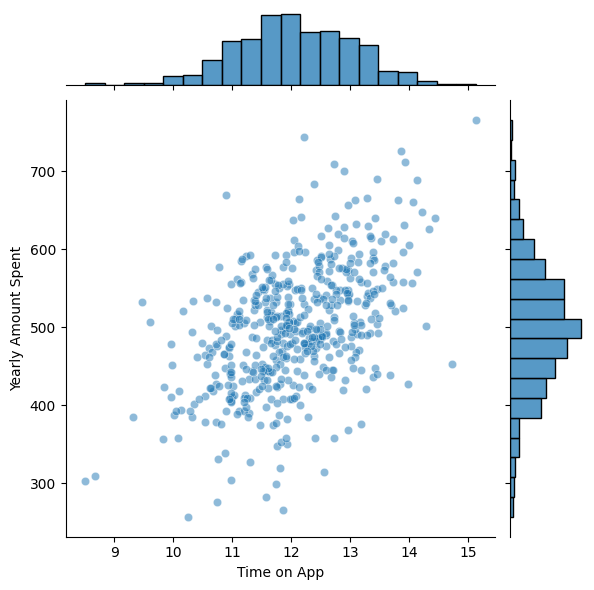

In [60]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df,alpha=0.5)

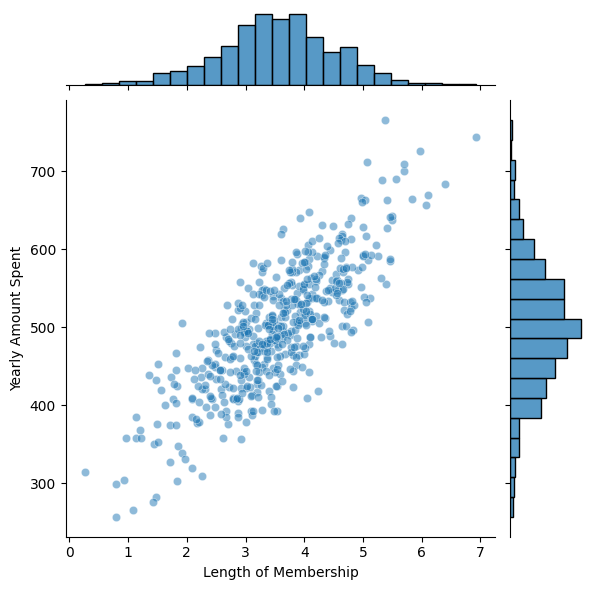

In [47]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=df,alpha=0.5)

In [48]:
# Selecting "Length of Membership" and "Time on App" as important features
X = data[['Length of Membership', 'Time on App']].values
y = data['Yearly Amount Spent'].values


In [49]:
#Standardize the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

In [50]:
# Add a column of ones to X to account for theta_0 (intercept term)
X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
theta = np.zeros(X.shape[1])

In [51]:
# Define the hypothesis
def hypothesis(X, theta):
    return np.dot(X, theta)


In [52]:
# Define the cost function
def cost_function(X, y, theta):
    m = len(y)
    return (1 / (2 * m)) * np.sum((hypothesis(X, theta) - y) ** 2)


In [53]:
# Implement gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        theta = theta - (alpha / m) * np.dot(X.T, (hypothesis(X, theta) - y))
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Train the model
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

In [54]:
# Output the optimum values of the weight vector and hyperparameters
print("Optimum values of the parameters (theta):", theta)
print("Learning Rate:", alpha)
print("Number of Iterations:", iterations)

Optimum values of the parameters (theta): [499.29248225  63.00623276  37.72732997]
Learning Rate: 0.01
Number of Iterations: 1000


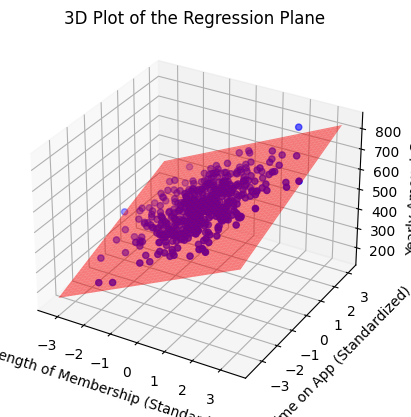

In [56]:
# Plot the regression line
# Since we have two features, we need to visualize the plane in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], y, color='blue', label='Actual Data')

# Generate a grid to plot the plane
x_surf, y_surf = np.meshgrid(np.linspace(X[:, 1].min(), X[:, 1].max(), 100),
                             np.linspace(X[:, 2].min(), X[:, 2].max(), 100))
z_surf = theta[0] + theta[1] * x_surf + theta[2] * y_surf

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5, label='Regression Plane')
ax.set_xlabel('Length of Membership (Standardized)')
ax.set_ylabel('Time on App (Standardized)')
ax.set_zlabel('Yearly Amount Spent')
plt.title('3D Plot of the Regression Plane')
plt.show()


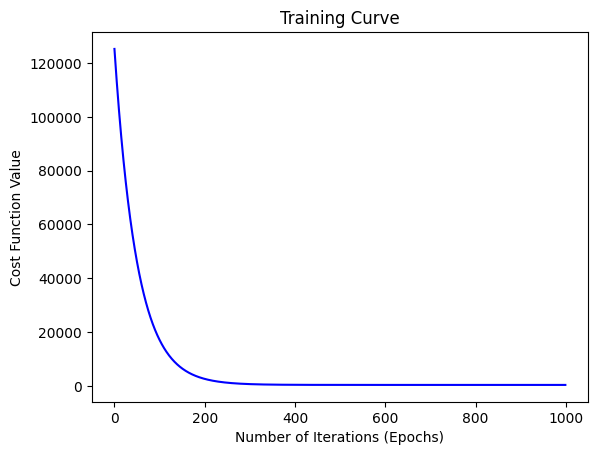

In [57]:
# Step 9: Plot the training curve (No of epochs Vs cost)
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Number of Iterations (Epochs)')
plt.ylabel('Cost Function Value')
plt.title('Training Curve')
plt.show()

In [58]:
 #Generate 2 sample test cases and predict the values
sample_test_cases = np.array([[4, 11], [3, 12]])
# Standardize the test cases
sample_test_cases = (sample_test_cases - X_mean) / X_std
sample_test_cases = np.c_[np.ones(sample_test_cases.shape[0]), sample_test_cases]

predicted_values = hypothesis(sample_test_cases, theta)
print("Predicted Values for Sample Test Cases:", predicted_values)


Predicted Values for Sample Test Cases: [488.75944671 463.6293458 ]
